In [1]:
# import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Project/mergedData.csv')
data = data.set_index('County Code')

#df = data[['PM2.5 Weighted Mean 24-hr', 'CO 2nd Max 8-hr', 'SO2 2nd Max 24-hr', 'PM10 Mean 24-hr']]
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
#scaler.fit(data)

#for i in range(0, 12):
    #df[i] = data[i]
    
data = data[['PM2.5 Weighted Mean 24-hr', 'CO 2nd Max 8-hr', 'SO2 2nd Max 24-hr', 'PM10 Mean 24-hr']]

# data = data[data['PM2.5 Weighted Mean 24-hr'] != 2.0820143884892084]
# data = data[data['CO 2nd Max 8-hr'] != 2.0820143884892084]
# data = data[data['SO2 2nd Max 24-hr'] != 2.0820143884892084]
# data = data[data['PM10 Mean 24-hr'] != 2.0820143884892084]

# data = data.drop(['PM2.5 Weighted Mean 24-hr'], axis=1)
# data = data.drop(['PM10 Mean 24-hr'], axis=1)

#data.iloc[3, 0]
data

,PM2.5 Weighted Mean 24-hr,CO 2nd Max 8-hr,SO2 2nd Max 24-hr,PM10 Mean 24-hr
County Code,,,,
1073,22.300000,16.300000,57.000000,42.000000
1089,16.300000,2.300000,2.082014,24.000000
4013,12.100000,7.200000,12.000000,70.000000
4019,2.082014,4.700000,7.000000,39.000000
5119,15.500000,2.900000,7.000000,29.000000
6001,11.200000,3.000000,2.082014,21.000000
6007,16.300000,3.500000,2.082014,28.000000
6009,9.000000,0.800000,2.082014,18.000000
6013,11.100000,2.600000,21.000000,19.000000


In [3]:
#data['new_col'] = list(zip(data['PM2.5 Weighted Mean 24-hr'], data['SO2 2nd Max 24-hr']))
kmeans_data = data.values
#kmeans_data = kmeans_data.values.reshape(-1, 1)
kmeans = KMeans(n_clusters=5).fit(kmeans_data)
y_kmeans = kmeans.predict(kmeans_data)
kmeans_data

array([[16.3, 57. ],
       [ 7.2, 12. ],
       [ 2.9,  7. ],
       ...,
       [ 0.3,  1. ],
       [ 0.5,  1. ],
       [ 0.7,  1. ]])

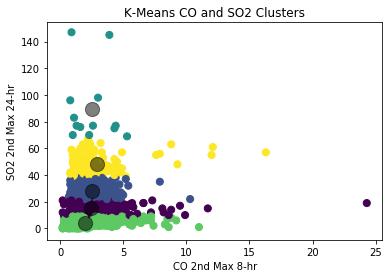

In [4]:
# zero_data = np.zeros(shape=(len(kmeans_data),1))
# zero_centers = np.zeros(shape=(len(centers), 1))
plt.scatter(kmeans_data[:, 0], kmeans_data[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel("CO 2nd Max 8-hr")
plt.ylabel("SO2 2nd Max 24-hr")
plt.title("K-Means CO and SO2 Clusters")
plt.show()